# Day 2: Recurrent Neural Networks (RNN)
## Objective
Build and train an RNN (LSTM) model to predict Tesla stock prices using a Kaggle dataset.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Tesla.csv - Tesla.csv.csv to Tesla.csv - Tesla.csv.csv


In [7]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#  Step 2: Load dataset (download Tesla stock dataset first from Kaggle)
data = pd.read_csv('Tesla.csv - Tesla.csv.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


### Preprocess Data
- Use the 'Open' price as target
- Normalize using MinMaxScaler
- Create sequences for supervised learning

In [8]:
# Use only 'Open' column (we only need the opening stock price for prediction)
prices = data[['Open']].values

# Scale data between 0 and 1 (helps neural networks converge faster)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(prices)

# Function to create sequences of past stock prices for training
# seq_length = number of past days used to predict the next day
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])   # past 'seq_length' days
        y.append(data[i+seq_length])     # next day price
    return np.array(X), np.array(y)

# Define sequence length (60 days history used to predict next day)
seq_length = 60
X, y = create_sequences(scaled_prices, seq_length)

# Split dataset into training (80%) and testing (20%)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Check shapes of training and test sets
X_train.shape, X_test.shape


((1305, 60, 1), (327, 60, 1))

### Build LSTM Model

In [9]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0792 - val_loss: 0.0039
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 8.8818e-04 - val_loss: 0.0018
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0012 - v

### Evaluate the Model

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
MSE: 107.80541332371178 MAE: 8.327232162730551 R2: 0.8254281442756006


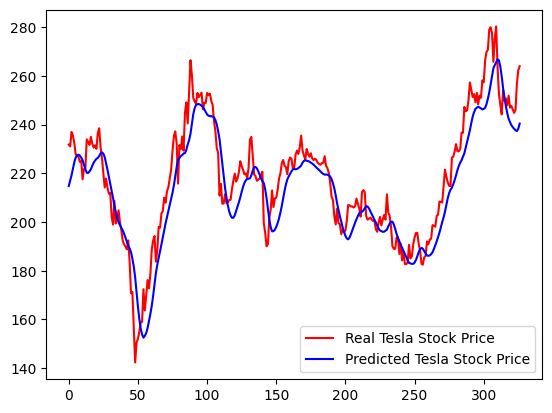

In [10]:
# Use the trained model to make predictions on test data
predicted = model.predict(X_test)

# Convert scaled predictions back to original stock price range
predicted_prices = scaler.inverse_transform(predicted)

# Convert actual test values back to original range
real_prices = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(real_prices, predicted_prices)  # Mean Squared Error
mae = mean_absolute_error(real_prices, predicted_prices) # Mean Absolute Error
r2 = r2_score(real_prices, predicted_prices)             # R-squared score

# Print metrics to check model performance
print('MSE:', mse, 'MAE:', mae, 'R2:', r2)

# Plot real vs predicted stock prices
plt.plot(real_prices, color='red', label='Real Tesla Stock Price')        # Actual prices
plt.plot(predicted_prices, color='blue', label='Predicted Tesla Stock Price')  # Predicted prices
plt.legend()
plt.show()
